In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import shutil

#Shemonto Drive Location. Shudhu Train ta Unzip Korelei hbe. Test lagbe na.

#shutil.unpack_archive("/content/drive/My Drive/VOC2012/VOC2012train.tar", "/content/Train_Dataset")
#shutil.unpack_archive("/content/drive/My Drive/VOC2012/VOC2012test.tar", "/content/Test_Dataset")
 
#Mehadi Drive Location
shutil.unpack_archive("/content/drive/My Drive/Colab Notebooks/VOC2012/VOC2012train.tar", "/content/Train_Dataset")
#shutil.unpack_archive("/content/drive/My Drive/Colab Notebooks/VOC2012/VOC2012test.tar", "/content/Test_Dataset")

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader# For custom data-sets
import torchvision.transforms as transforms
import cv2
import numpy as np
import torchvision
import matplotlib.pyplot as plt
import torch.nn as nn
import os
from PIL import Image
import torch.nn.functional as F
 
import scipy.ndimage.morphology as morph

In [ ]:
path = "/content/Train_Dataset/VOCdevkit/VOC2012/ImageSets/Segmentation/train.txt"
 
#print(os.listdir("../input/pascal-voc-2012/VOC2012/JPEGImages"))
f = open(path, "r").read().split('\n')
f = f[:1464]
folder_data = "/content/Train_Dataset/VOCdevkit/VOC2012/JPEGImages"
folder_mask = "/content/Train_Dataset/VOCdevkit/VOC2012/SegmentationClass"

In [ ]:
'''
FOR RESIZING 


tfs = transforms.Compose([transforms.CenterCrop((256, 256)),
                   transforms.ToTensor()])
#tfs = transforms.ToTensor()
img = [];
seg = [];
 
 
img_paths = os.listdir(folder_data)
seg_paths = os.listdir(folder_mask)
transform = transforms.Compose([
                                    transforms.CenterCrop((256, 256)),
                                    transforms.ToTensor()])
resize = transforms.CenterCrop((256, 256))
data = len(f)

for i in range (data):
        a = Image.open(folder_data + "/" + f[i] + ".jpg").convert('RGB')
        a = resize(a)
        
        b = Image.open(folder_mask + "/" + f[i] + ".png").convert('RGB')
        b = resize(b)
 
        img.append(np.asarray(a))
        seg.append(np.asarray(b))
'''

In [ ]:

#No Resize
img = [];
seg = [];
 
 
img_paths = os.listdir(folder_data)
seg_paths = os.listdir(folder_mask)
resize = transforms.Resize((128,512),interpolation=Image.NEAREST)
#resize = transforms.CenterCrop((112,500)) #previously it was 256,256
data = len(f)

for i in range (data):
        a = Image.open(folder_data + "/" + f[i] + ".jpg").convert('RGB')
        a = resize(a)
        
        b = Image.open(folder_mask + "/" + f[i] + ".png").convert('RGB')
        b = resize(b)
 
        img.append(np.asarray(a))
        seg.append(np.asarray(b))

In [ ]:
img[4].shape

(128, 512, 3)

In [ ]:
'''
indexMax = 0
indexMin = 0
print(len(img))
min = img[0]
for i in range(1 , len(img)-1):
    if min.shape>img[i].shape:
        min = img[i]
        indexMin = i

max = img[0]
for i in range(1 , len(img)-1):
    if max.shape<img[i+1].shape:
        max = img[i]
        indexMax = i

print(min.shape)
print(max.shape)

print()

print(f[indexMin])
print(f[indexMax])
'''

'\nindexMax = 0\nindexMin = 0\nprint(len(img))\nmin = img[0]\nfor i in range(1 , len(img)-1):\n    if min.shape>img[i].shape:\n        min = img[i]\n        indexMin = i\n\nmax = img[0]\nfor i in range(1 , len(img)-1):\n    if max.shape<img[i+1].shape:\n        max = img[i]\n        indexMax = i\n\nprint(min.shape)\nprint(max.shape)\n\nprint()\n\nprint(f[indexMin])\nprint(f[indexMax])\n'

In [ ]:
#print(np.asarray(img[0]))
#seg[5]

In [ ]:
np.save('img.npy',img)
np.save('seg.npy',seg)

In [ ]:
'''
img = np.load('img.npy')
seg = np.load('seg.npy')
'''
img = np.load('img.npy' , allow_pickle=True)
seg = np.load('seg.npy' , allow_pickle=True)



In [ ]:
img.shape

(1464, 128, 512, 3)

In [ ]:
#img = img[:,:,:].reshape([112,500,3])
#seg = seg[:,:,:].reshape([112,500,3])




In [ ]:
#check = np.resize(img[0] , (112,500,3))
#check.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(img, seg, test_size=0.30, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25,random_state=42)

In [ ]:
#X_train[0]
print(Y_train.shape)
print(Y_val.shape)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(768, 128, 512, 3)
(256, 128, 512, 3)
(768, 128, 512, 3)
(440, 128, 512, 3)
(256, 128, 512, 3)


In [ ]:
'''
#%tensorflow_version 1.x
from keras.utils import to_categorical,normalize
Y_train = to_categorical(Y_train)
Y_val = to_categorical(Y_val)
X_train = (X_train-np.mean(X_train))/np.max(X_train)
X_test = (X_test-np.mean(X_test))/np.max(X_test)
X_val = (X_val-np.mean(X_val))/np.max(X_val)
'''

'\n#%tensorflow_version 1.x\nfrom keras.utils import to_categorical,normalize\nY_train = to_categorical(Y_train)\nY_val = to_categorical(Y_val)\nX_train = (X_train-np.mean(X_train))/np.max(X_train)\nX_test = (X_test-np.mean(X_test))/np.max(X_test)\nX_val = (X_val-np.mean(X_val))/np.max(X_val)\n'

In [ ]:
from keras.models import Model
from keras.layers import MaxPooling2D,Conv2D,Dense,BatchNormalization,concatenate,Input,Dropout,Maximum,Activation,Dense,Flatten,UpSampling2D,Conv2DTranspose
from keras.layers.convolutional import Cropping2D # newly added
from keras.optimizers import SGD,Adam,RMSprop
import keras.callbacks as callbacks
import keras.initializers as initializers
from keras.callbacks import Callback
from keras import regularizers

In [ ]:
img_input = Input(shape=(128,512,3), name='input') 

conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(img_input)
conv1 = Dropout(0.5)(conv1)
conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
pool1 = MaxPooling2D((2, 2))(conv1)
 
conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
conv2 = Dropout(0.5)(conv2)
conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
pool2 = MaxPooling2D((2, 2))(conv2)
 
 
conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
conv3 = Dropout(0.5)(conv3)
conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv3)
pool3 = MaxPooling2D((2, 2))(conv3)
 
## Decoder layers
conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
conv4 = Dropout(0.5)(conv4)
conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv4)
 
up1 = concatenate([UpSampling2D((2, 2))(conv4), conv3], axis=-1)
conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(up1)
conv5 = Dropout(0.5)(conv5)
conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv5)
 
up2 = concatenate([UpSampling2D((2, 2))(conv5), conv2], axis=-1)
conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(up2)
conv6 = Dropout(0.5)(conv6)
conv6 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv6)
 
up3 = concatenate([UpSampling2D((2, 2))(conv6), conv1], axis=-1)
conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(up3)
conv7 = Dropout(0.5)(conv7)
conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv7)
 
out = Conv2D(3, (1, 1) , activation='softmax', padding='same')(conv7)


In [ ]:
def get_crop_shape(target, refer):
        # width, the 3rd dimension
        print(target.get_shape()[1])
        print(type(target.get_shape()[1]))

        cw = (target.get_shape()[2] - refer.get_shape()[2])
        assert (cw >= 0)
        if cw % 2 != 0:
            cw1, cw2 = int(cw/2), int(cw/2) + 1
        else:
            cw1, cw2 = int(cw/2), int(cw/2)
        # height, the 2nd dimension
        ch = (target.get_shape()[1] - refer.get_shape()[1])
        assert (ch >= 0)
        if ch % 2 != 0:
            ch1, ch2 = int(ch/2), int(ch/2) + 1
        else:
            ch1, ch2 = int(ch/2), int(ch/2)

        return (ch1, ch2), (cw1, cw2)

In [ ]:
# For my testing purpose @@@

img_input = Input(shape=(112,500,3), name='input') 

conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(img_input)
conv1 = Dropout(0.5)(conv1)
conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
pool1 = MaxPooling2D((2, 2))(conv1)
 
conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
conv2 = Dropout(0.5)(conv2)
conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
pool2 = MaxPooling2D((2, 2))(conv2)
 
 
conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
conv3 = Dropout(0.5)(conv3)
conv3 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv3)
pool3 = MaxPooling2D((2, 2))(conv3)
 
## Decoder layers
conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3)
conv4 = Dropout(0.5)(conv4)
conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv4)

up_conv4 = UpSampling2D(size=(2, 2), data_format="channels_last")(conv4)
ch, cw = get_crop_shape(conv3, up_conv4)
crop_conv3 = Cropping2D(cropping=(ch,cw), data_format="channels_last")(conv3)
up1   = concatenate([up_conv4, crop_conv3], axis=-1)
 
#up1 = concatenate([UpSampling2D((2, 2))(conv4), conv3], axis=-1)
conv5 = Conv2D(128, (3, 3), activation='relu', padding='same')(up1)
conv5 = Dropout(0.5)(conv5)
conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv5)

up_conv5 = UpSampling2D(size=(2, 2), data_format="channels_last")(conv5)
ch, cw = get_crop_shape(conv2, up_conv5)
crop_conv2 = Cropping2D(cropping=(ch,cw), data_format="channels_last")(conv2)
up2   = concatenate([up_conv5, crop_conv2], axis=-1)
 
#up2 = concatenate([UpSampling2D((2, 2))(conv5), conv2], axis=-1)
conv6 = Conv2D(64, (3, 3), activation='relu', padding='same')(up2)
conv6 = Dropout(0.5)(conv6)
conv6 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv6)

up_conv6 = UpSampling2D(size=(2, 2), data_format="channels_last")(conv6)
ch, cw = get_crop_shape(conv1, up_conv6)
crop_conv1 = Cropping2D(cropping=(ch,cw), data_format="channels_last")(conv1)
up3   = concatenate([up_conv6, crop_conv1], axis=-1)
 
#up3 = concatenate([UpSampling2D((2, 2))(conv6), conv1], axis=-1)
conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(up3)
conv7 = Dropout(0.5)(conv7)
conv7 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv7)
 
out = Conv2D(3, (1, 1) , activation='softmax', padding='same')(conv7)


28
<class 'int'>
56
<class 'int'>
112
<class 'int'>


In [ ]:
'''
up_conv5 = UpSampling2D(size=(2, 2), data_format="channels_last")(conv5)
ch, cw = get_crop_shape(conv4, up_conv5)
crop_conv4 = Cropping2D(cropping=(ch,cw), data_format="channels_last")(conv4)
up6   = concatenate([up_conv5, crop_conv4], axis=concat_axis)`
'''

'\nup_conv5 = UpSampling2D(size=(2, 2), data_format="channels_last")(conv5)\nch, cw = get_crop_shape(conv4, up_conv5)\ncrop_conv4 = Cropping2D(cropping=(ch,cw), data_format="channels_last")(conv4)\nup6   = concatenate([up_conv5, crop_conv4], axis=concat_axis)`\n'

In [ ]:
from keras import backend as K
def dice_coef(y_true, y_pred, epsilon=1e-6):
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    return (2. * intersection) / (K.sum(K.square(y_true),axis=-1) + K.sum(K.square(y_pred),axis=-1) + epsilon)
 
def dice_coef_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)
 
def iou_loss_core(y_true, y_pred, smooth=1):
    intersection = K.sum(K.abs(y_true * y_pred), axis=-1)
    union = K.sum(y_true,-1) + K.sum(y_pred,-1) - intersection
    iou = (intersection + smooth) / ( union + smooth)
    return iou

def get_iou(pred_box, gt_box):
    """
    pred_box : the coordinate for predict bounding box
    gt_box :   the coordinate for ground truth bounding box
    return :   the iou score
    the  left-down coordinate of  pred_box:(pred_box[0], pred_box[1])
    the  right-up coordinate of  pred_box:(pred_box[2], pred_box[3])
    """
    # 1.get the coordinate of inters
    ixmin = max(pred_box[0], gt_box[0])
    ixmax = min(pred_box[2], gt_box[2])
    iymin = max(pred_box[1], gt_box[1])
    iymax = min(pred_box[3], gt_box[3])

    iw = np.maximum(ixmax-ixmin+1., 0.)
    ih = np.maximum(iymax-iymin+1., 0.)

    # 2. calculate the area of inters
    inters = iw*ih

    # 3. calculate the area of union
    uni = ((pred_box[2]-pred_box[0]+1.) * (pred_box[3]-pred_box[1]+1.) +
           (gt_box[2] - gt_box[0] + 1.) * (gt_box[3] - gt_box[1] + 1.) -
           inters)

    # 4. calculate the overlaps between pred_box and gt_box
    iou = inters / uni

    return iou

In [ ]:
from tensorflow.python.keras.metrics import Metric

def mean_iou(y_true, y_pred):
   score, up_opt = Metric.mean_iou(y_true, y_pred, NUM_CLASSES)
   K.get_session().run(tf.local_variables_initializer())
   return score

In [ ]:
def calculate_iou(y_true, y_pred):
    
    
    """
    Input:
    Keras provides the input as numpy arrays with shape (batch_size, num_columns).
    
    Arguments:
    y_true -- first box, numpy array with format [x, y, width, height, conf_score]
    y_pred -- second box, numpy array with format [x, y, width, height, conf_score]
    x any y are the coordinates of the top left corner of each box.
    
    Output: IoU of type float32. (This is a ratio. Max is 1. Min is 0.)
    
    """

    
    results = []
    
    for i in range(0,y_true.shape[0]):
    
        # set the types so we are sure what type we are using
        y_true = y_true.astype(np.float32)
        y_pred = y_pred.astype(np.float32)


        # boxTrue
        x_boxTrue_tleft = y_true[0,0]  # numpy index selection
        y_boxTrue_tleft = y_true[0,1]
        boxTrue_width = y_true[0,2]
        boxTrue_height = y_true[0,3]
        area_boxTrue = (boxTrue_width * boxTrue_height)

        # boxPred
        x_boxPred_tleft = y_pred[0,0]
        y_boxPred_tleft = y_pred[0,1]
        boxPred_width = y_pred[0,2]
        boxPred_height = y_pred[0,3]
        area_boxPred = (boxPred_width * boxPred_height)


        # calculate the bottom right coordinates for boxTrue and boxPred

        # boxTrue
        x_boxTrue_br = x_boxTrue_tleft + boxTrue_width
        y_boxTrue_br = y_boxTrue_tleft + boxTrue_height # Version 2 revision

        # boxPred
        x_boxPred_br = x_boxPred_tleft + boxPred_width
        y_boxPred_br = y_boxPred_tleft + boxPred_height # Version 2 revision


        # calculate the top left and bottom right coordinates for the intersection box, boxInt

        # boxInt - top left coords
        x_boxInt_tleft = np.max([x_boxTrue_tleft,x_boxPred_tleft])
        y_boxInt_tleft = np.max([y_boxTrue_tleft,y_boxPred_tleft]) # Version 2 revision

        # boxInt - bottom right coords
        x_boxInt_br = np.min([x_boxTrue_br,x_boxPred_br])
        y_boxInt_br = np.min([y_boxTrue_br,y_boxPred_br]) 

        # Calculate the area of boxInt, i.e. the area of the intersection 
        # between boxTrue and boxPred.
        # The np.max() function forces the intersection area to 0 if the boxes don't overlap.
        
        
        # Version 2 revision
        area_of_intersection = \
        np.max([0,(x_boxInt_br - x_boxInt_tleft)]) * np.max([0,(y_boxInt_br - y_boxInt_tleft)])

        iou = area_of_intersection / ((area_boxTrue + area_boxPred) - area_of_intersection)


        # This must match the type used in py_func
        iou = iou.astype(np.float32)
        
        # append the result to a list at the end of each loop
        results.append(iou)
    
    # return the mean IoU score for the batch
    return np.mean(results)

In [ ]:
def IoU(y_true, y_pred):
    
    # Note: the type float32 is very important. It must be the same type as the output from
    # the python function above or you too may spend many late night hours 
    # trying to debug and almost give up.
    
    iou = tf.py_function(calculate_iou, [y_true, y_pred], tf.float32)

    return iou

In [ ]:
import tensorflow as tf
from tensorflow import keras

model = Model(inputs = img_input, outputs = out)
model.summary()


model.compile(optimizer=Adam(lr=1e-9),loss='binary_crossentropy',metrics=['accuracy' , 'mae'])
#model.compile(optimizer=Adam(lr=1e-9),loss='binary_crossentropy', metrics=[IoU])
#model.compile(optimizer=Adam(lr=1e-5),loss=keras.losses.binary_crossentropy,metrics=['accuracy'])
#model.compile(optimizer=Adam(lr=1e-9),loss=iou_loss_core,metrics=['accuracy'])

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 128, 512, 3)  0                                            
__________________________________________________________________________________________________
conv2d_139 (Conv2D)             (None, 128, 512, 32) 896         input[0][0]                      
__________________________________________________________________________________________________
dropout_67 (Dropout)            (None, 128, 512, 32) 0           conv2d_139[0][0]                 
__________________________________________________________________________________________________
conv2d_140 (Conv2D)             (None, 128, 512, 32) 9248        dropout_67[0][0]                 
____________________________________________________________________________________________

In [ ]:
history = model.fit(X_train,Y_train,validation_data=(X_val,Y_val),batch_size=32,epochs=10,shuffle=True)

Train on 768 samples, validate on 256 samples
Epoch 1/10
768/768 [==============================] - 16s 21ms/step - loss: 150.7141 - accuracy: 0.5265 - mae: 32.4900 - val_loss: 77.6430 - val_accuracy: 0.5345 - val_mae: 34.5437
Epoch 2/10
768/768 [==============================] - 8s 11ms/step - loss: 150.6508 - accuracy: 0.5265 - mae: 32.4900 - val_loss: 77.6424 - val_accuracy: 0.5346 - val_mae: 34.5437
Epoch 3/10
768/768 [==============================] - 8s 11ms/step - loss: 150.6747 - accuracy: 0.5265 - mae: 32.4900 - val_loss: 77.6419 - val_accuracy: 0.5346 - val_mae: 34.5437
Epoch 4/10
768/768 [==============================] - 8s 11ms/step - loss: 150.7384 - accuracy: 0.5265 - mae: 32.4900 - val_loss: 77.6413 - val_accuracy: 0.5346 - val_mae: 34.5437
Epoch 5/10
768/768 [==============================] - 8s 11ms/step - loss: 150.6538 - accuracy: 0.5265 - mae: 32.4900 - val_loss: 77.6408 - val_accuracy: 0.5346 - val_mae: 34.5437
Epoch 6/10
768/768 [==============================] -

In [ ]:
#Y_pred = np.argmax(model.predict(X_train),axis=-1)
Y_pred =  np.argmax(model.predict(X_test),axis=-1)

Image: 0


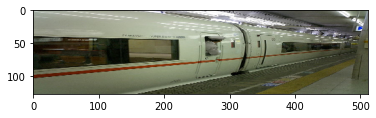

Predicted:- 


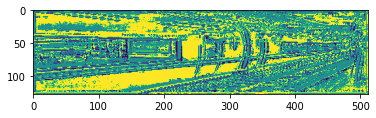

Actual:- 


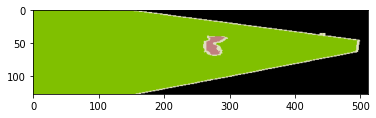

Image: 1


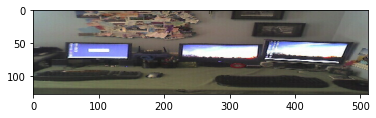

Predicted:- 


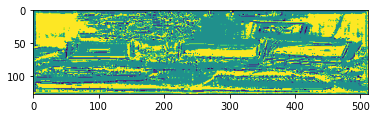

Actual:- 


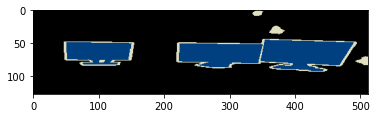

Image: 2


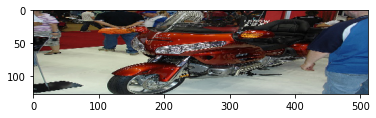

Predicted:- 


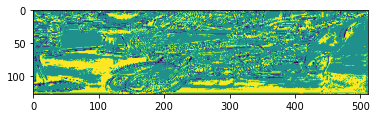

Actual:- 


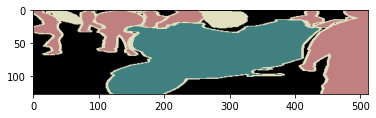

Image: 3


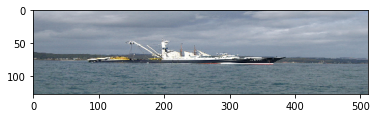

Predicted:- 


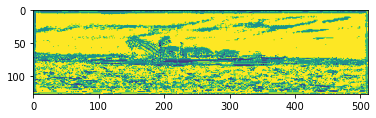

Actual:- 


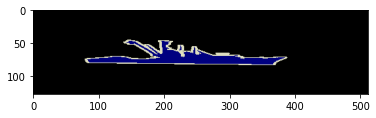

Image: 4


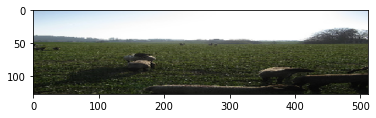

Predicted:- 


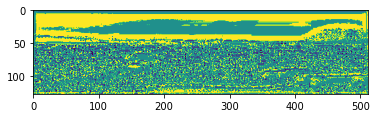

Actual:- 


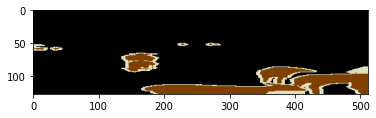

Image: 5


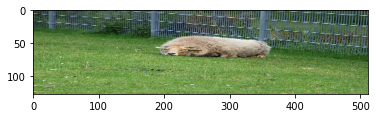

Predicted:- 


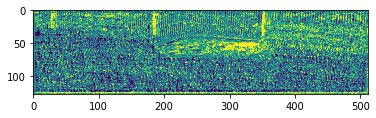

Actual:- 


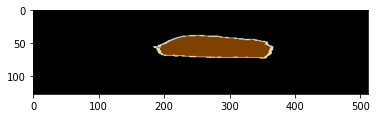

Image: 6


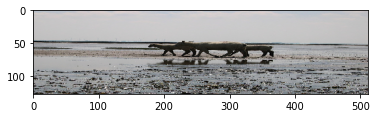

Predicted:- 


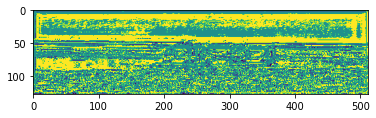

Actual:- 


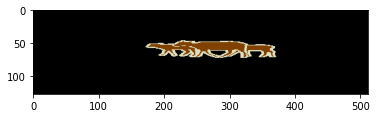

Image: 7


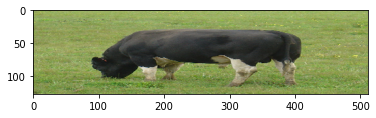

Predicted:- 


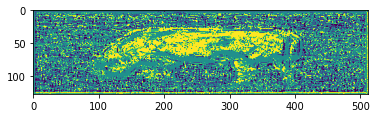

Actual:- 


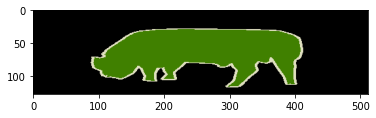

Image: 8


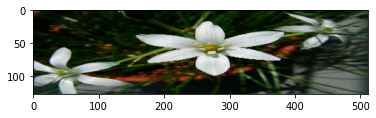

Predicted:- 


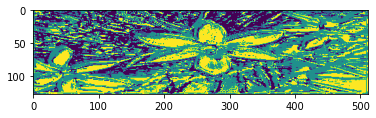

Actual:- 


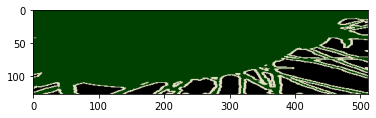

Image: 9


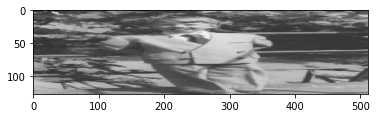

Predicted:- 


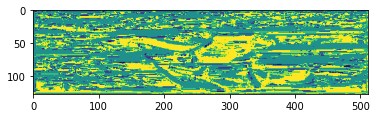

Actual:- 


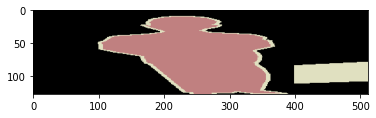

Image: 10


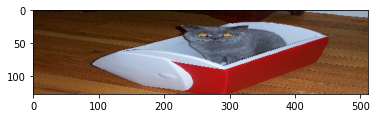

Predicted:- 


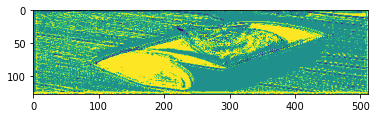

Actual:- 


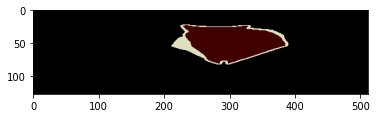

Image: 11


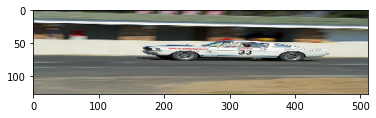

Predicted:- 


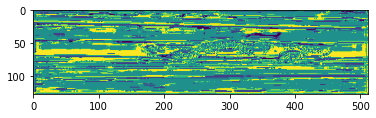

Actual:- 


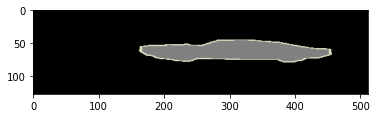

Image: 12


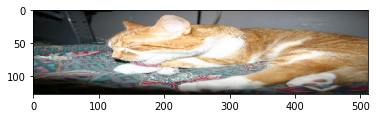

Predicted:- 


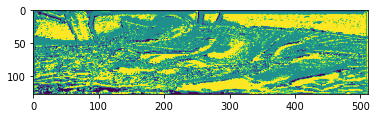

Actual:- 


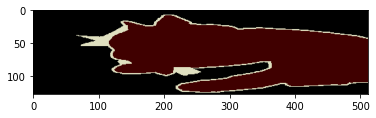

Image: 13


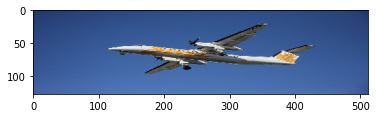

Predicted:- 


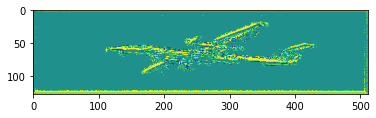

Actual:- 


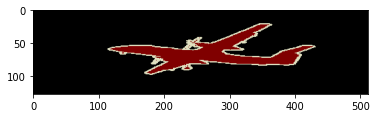

Image: 14


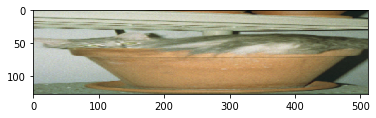

Predicted:- 


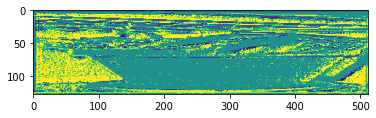

Actual:- 


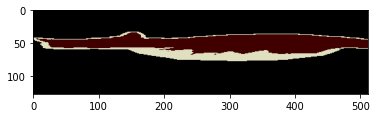

Image: 15


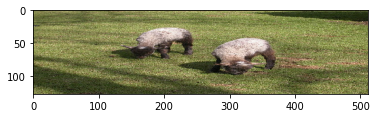

Predicted:- 


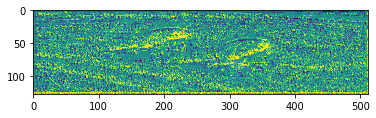

Actual:- 


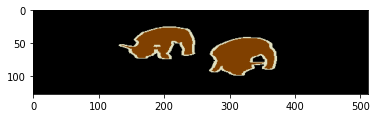

Image: 16


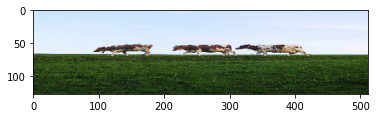

Predicted:- 


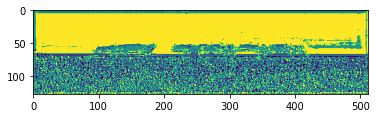

Actual:- 


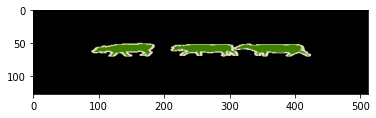

Image: 17


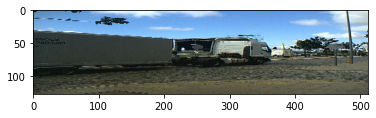

Predicted:- 


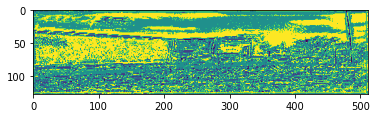

Actual:- 


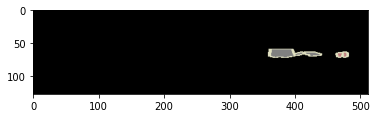

Image: 18


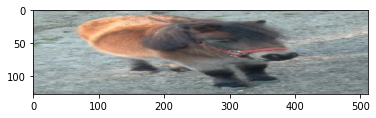

Predicted:- 


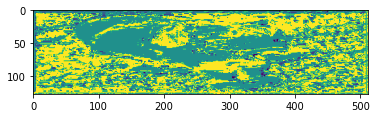

Actual:- 


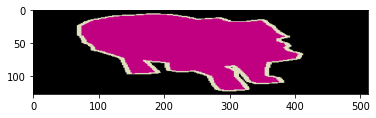

Image: 19


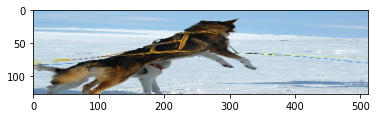

Predicted:- 


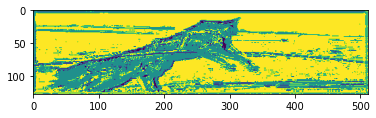

Actual:- 


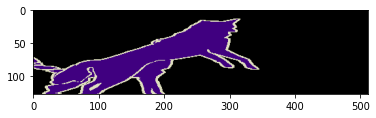

In [ ]:
 for i in range(0,20):
  print('Image: ' + str(i))
  plt.imshow(X_test[i,:,:,:])
  plt.show()
  print('Predicted:- ')
  plt.imshow(Y_pred[i,:,:])
  plt.show()
  print('Actual:- ')
  plt.imshow(Y_test[i,:,:,:])
  plt.show()

Image: 234


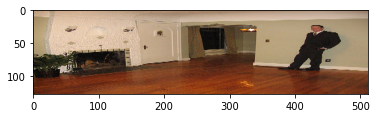

Predicted:- 


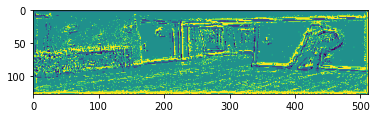

Actual:- 


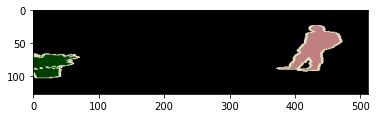

In [ ]:
i = 234

print('Image: ' + str(i))
plt.imshow(X_test[i,:,:,:])
plt.show()
print('Predicted:- ')
plt.imshow(Y_pred[i,:,:])
plt.show()
print('Actual:- ')
plt.imshow(Y_test[i,:,:,:])
plt.show()